<a href="https://colab.research.google.com/github/abyanjan/Customer-Segmentation/blob/master/Bank_Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  BANK CUSTOMER SEGMENTATION


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="500">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
#READ DATA
credit_df = pd.read_csv('data.csv')
credit_df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
# DATA SIZE
print(f'Number of Data Samples {credit_df.shape[0]}')
print(f'Number of Columns {credit_df.shape[1]}')

Number of Data Samples 8950
Number of Columns 18


### DESCRIPTION OF THE COLUMNS

- CUSTID: Identification of Credit Card holder 
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user  
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [ ]:
# SUMMARY OF DATA
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Mean balance is \$1564 
- Balance frequency is frequently updated on average ~0.9
- Purchases average is \$1000
- one off purchase average is ~$600
- Average purchases frequency is around 0.5
- average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
- Average credit limit ~ 4500
- Percent of full payment is 15%
- Average tenure is 11 years

In [ ]:
# Let's see who made one off purchase of $40761!
credit_df[credit_df['ONEOFF_PURCHASES']==40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# Maximum amount of cash withdrawl in advance
credit_df['CASH_ADVANCE'].max()

47137.211760000006

In [ ]:
# Let's see who made cash advance of $47137!
credit_df[credit_df['CASH_ADVANCE']==47137.211760000006]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


- This customer made 123 cash advance transactions!!
- Never paid credit card in full

# VISUALIZE AND EXPLORE DATASET

### MISSING DATA

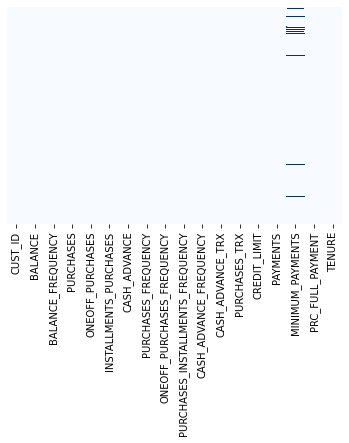

In [ ]:
# Let's see if we have any missing data
sns.heatmap(credit_df.isnull(), yticklabels=False, cmap='Blues', cbar=False)

In [ ]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
credit_df.loc[credit_df['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = credit_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
credit_df.loc[credit_df['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = credit_df['CREDIT_LIMIT'].mean()

In [ ]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Let's see if we have duplicated entries in the data
credit_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here 
credit_df.drop('CUST_ID', axis = 1, inplace=True)
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
print(f'Number of columns: {len(credit_df.columns)}\n')
credit_df.columns

Number of columns: 17



Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### HISTOGRAMS OF THE FEATURES

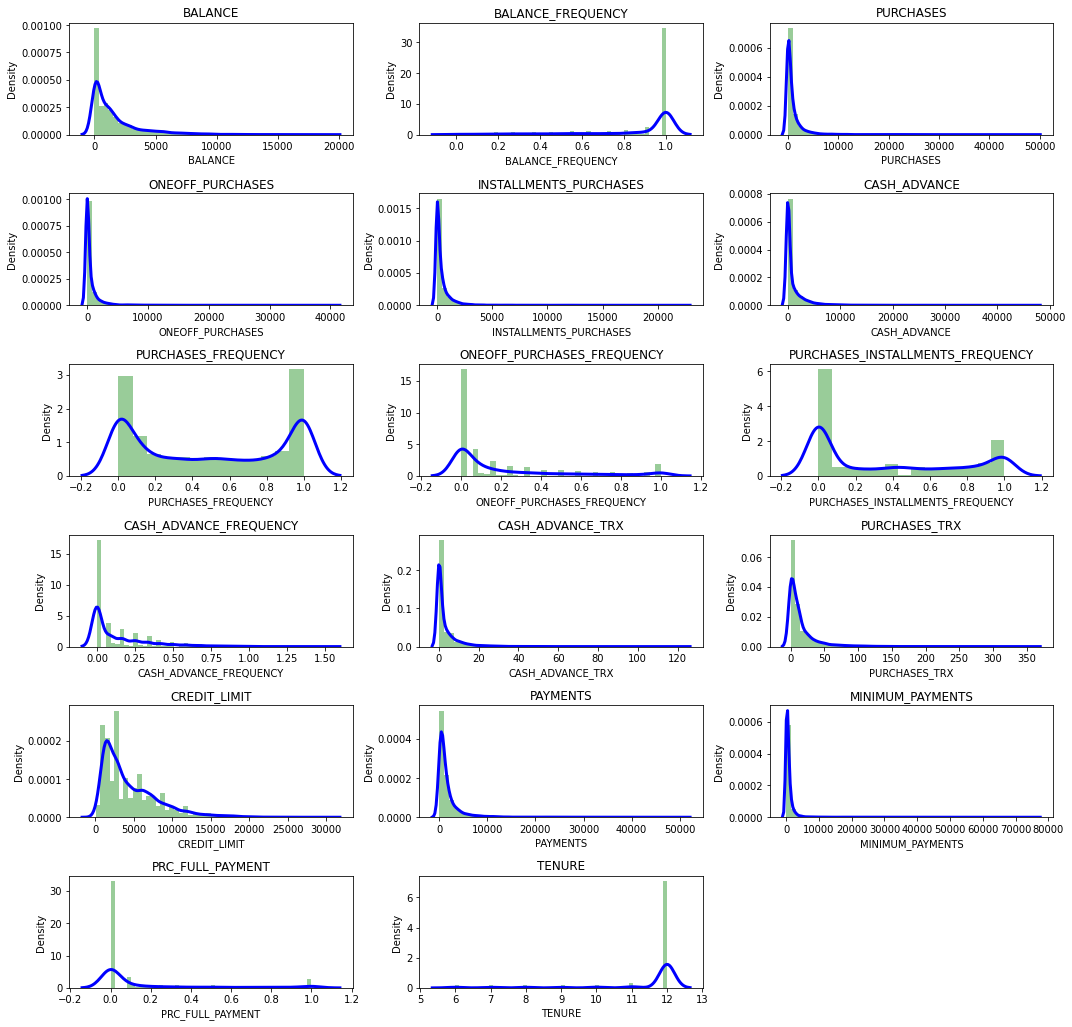

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,40))
for i in range(len(credit_df.columns)):
  plt.subplot(17, 3, i+1)
  sns.distplot(credit_df[credit_df.columns[i]], kde_kws={'color':'b','label':'KDE','lw':3}, hist_kws={'color':'g'})
  plt.title(credit_df.columns[i])
  plt.tight_layout()


- Mean of balance is \$1500
- 'Balance_Frequency' for most customers is updated frequently ~1
- For 'PURCHASES_FREQUENCY', there are two distinct group of customers
- For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
- Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
- Credit limit average is around $4500
-Most customers are ~11 years tenure

### CORRELATION PLOT

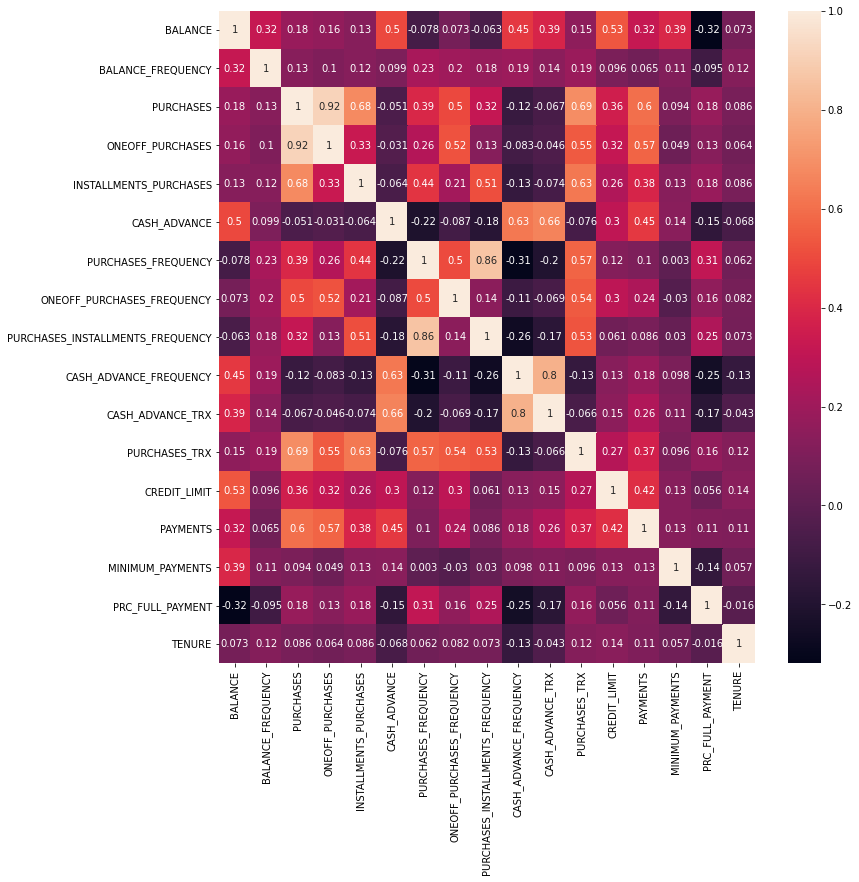

In [ ]:
# sns.pairplot(creditcard_df)

corr = credit_df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)

- Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
- Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
- 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
- Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# CLUSTERING WITH K-MEANS

### FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
credit_df_scaled = scaler.fit_transform(credit_df)

In [ ]:
credit_df_scaled.shape

(8950, 17)

In [ ]:
credit_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
scores_1 = []
k_values = range(1,21)

for i in k_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(credit_df_scaled)
  scores_1.append(kmeans.inertia_)

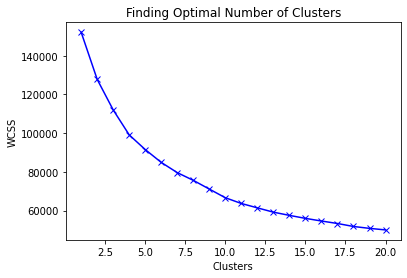

In [ ]:
plt.plot(k_values,scores_1,'bx-')
plt.title("Finding Optimal Number of Clusters")
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

- From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
- However, the values does not reduce linearly until 8th cluster. 
- Let's choose the number of clusters to be 8.

### APPLY K-MEANS METHOD WITH THE SELECTED K CLUSTERS

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(credit_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.labels_
labels

array([1, 4, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
# CREATING DATA WITH THE CLUSTER CENTERS
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[credit_df.columns])
cluster_centers         

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
1,0.012290,0.403960,-0.357123,-0.241749,-0.400166,-0.094058,-0.853206,-0.394841,-0.754707,0.103468,-0.028102,-0.481745,-0.303265,-0.249361,-0.011732,-0.455361,0.273248
2,-0.134611,0.400605,0.540529,0.670609,0.045864,-0.331481,0.979086,1.904315,0.170176,-0.413621,-0.330187,0.617582,0.431046,0.144113,-0.158386,0.444399,0.268773
3,-0.361746,0.332427,-0.034919,-0.242534,0.362821,-0.363296,0.993026,-0.383768,1.205252,-0.473549,-0.360250,0.189465,-0.261298,-0.214984,-0.030438,0.313451,0.256258
4,1.686129,0.393025,-0.217205,-0.155325,-0.228287,2.009008,-0.470733,-0.207959,-0.411112,1.913538,1.919868,-0.265613,1.029379,0.818956,0.552301,-0.390101,0.071370
5,1.042239,0.465006,2.500780,1.806350,2.594499,-0.161300,1.164798,1.562962,1.273275,-0.284847,-0.150801,3.128411,1.303209,1.436890,0.559682,0.251719,0.337526
6,-0.701215,-2.139409,-0.310202,-0.234619,-0.302316,-0.322522,-0.554262,-0.441259,-0.440150,-0.521634,-0.376396,-0.419230,-0.176045,-0.201790,-0.257018,0.283849,0.201369
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns= [credit_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
1,1590.055705,0.972965,240.206388,191.184026,49.202187,781.626840,0.147918,0.084669,0.064497,0.155849,3.057049,2.735465,3391.048934,1011.267652,836.864560,0.020529,11.882994
2,1284.294254,0.972170,2158.053520,1705.511649,452.541872,283.739175,0.883305,0.770552,0.432070,0.052374,0.995544,30.060606,6062.769405,2150.336332,495.094322,0.283694,11.877005
3,811.530431,0.956020,928.599272,189.879812,739.162116,217.022499,0.888900,0.087972,0.843436,0.040382,0.790387,19.419227,3543.741428,1110.786328,793.273098,0.245394,11.860258
4,5074.010044,0.970375,539.143482,334.629072,204.630871,5191.855751,0.301422,0.140419,0.201051,0.518063,16.350515,8.107675,8239.753202,4103.940565,2151.320463,0.039617,11.612829
5,3733.806745,0.987426,6346.159662,3590.608789,2757.241014,640.617891,0.957840,0.668720,0.870470,0.078143,2.219718,92.470423,9236.056338,5892.801050,2168.520942,0.227338,11.969014
6,104.954052,0.370465,340.454239,203.017919,137.687420,302.527006,0.267898,0.070822,0.189510,0.030760,0.680203,4.289340,3853.925080,1148.980637,265.237883,0.236736,11.786802
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


In [ ]:
# concatenate the clusters labels to our original dataframe
credit_df_cluster = pd.concat([credit_df,pd.DataFrame({'cluster':labels})], axis = 1)
credit_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


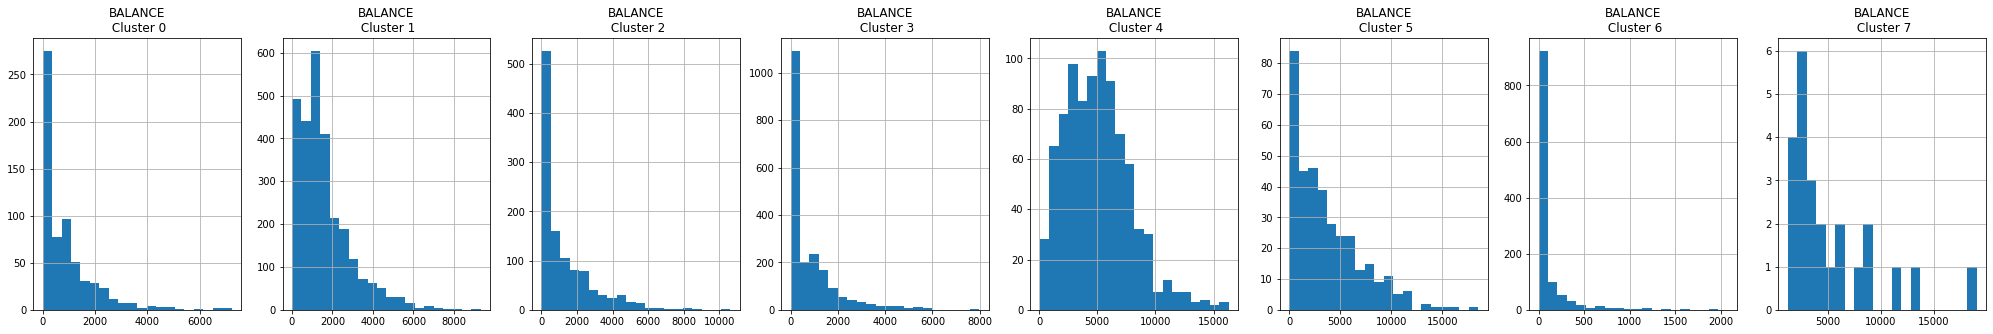

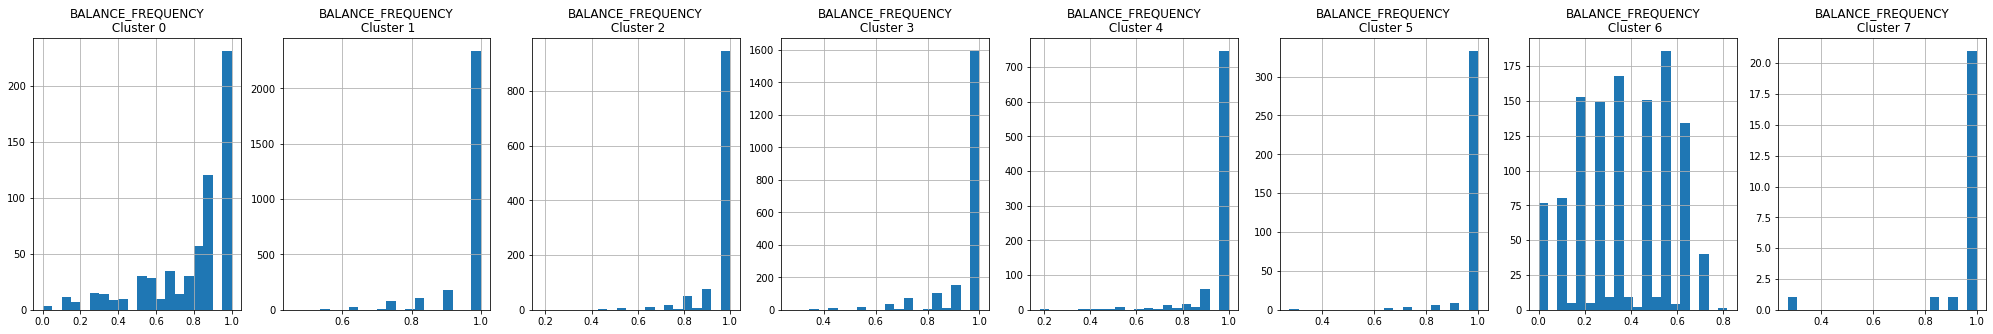

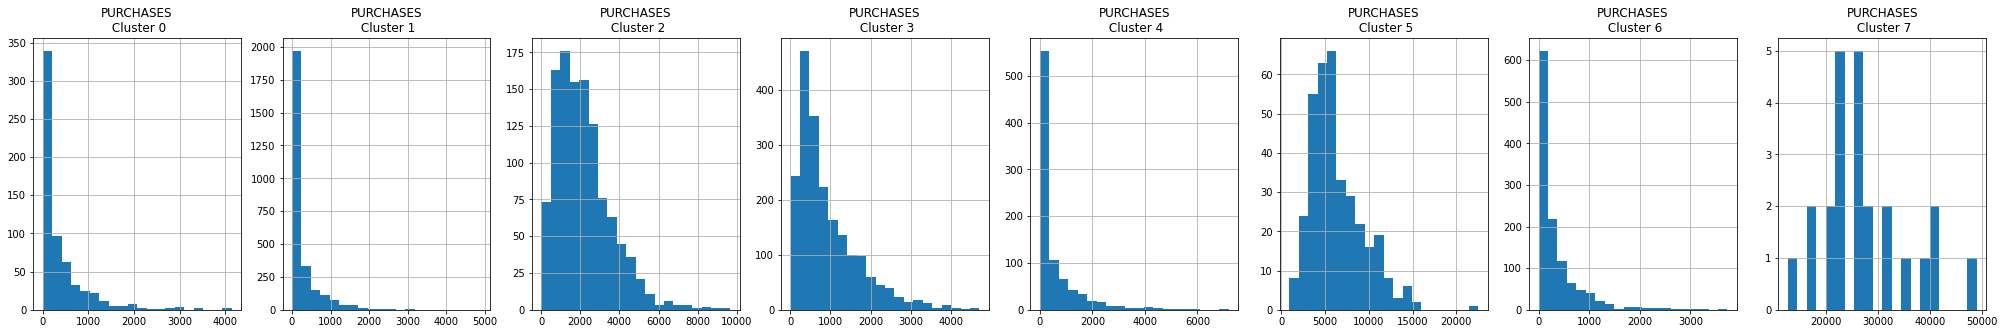

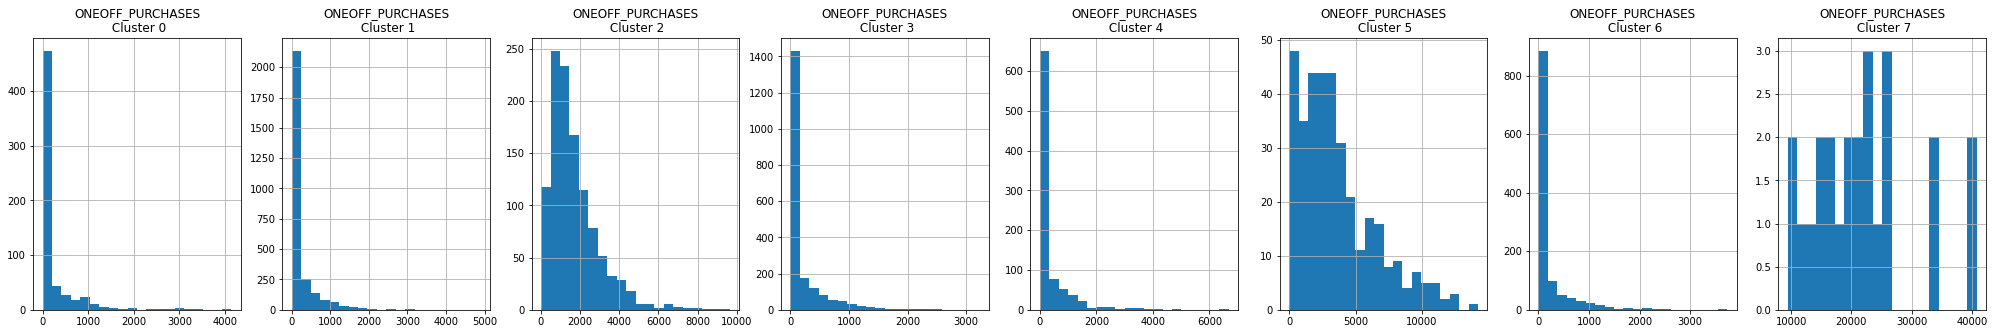

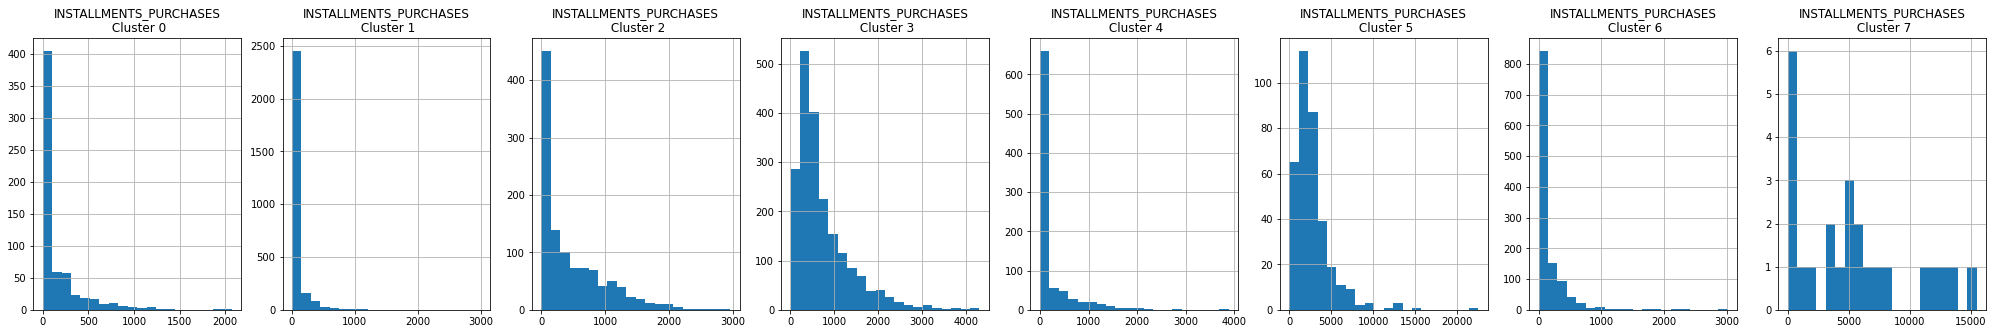

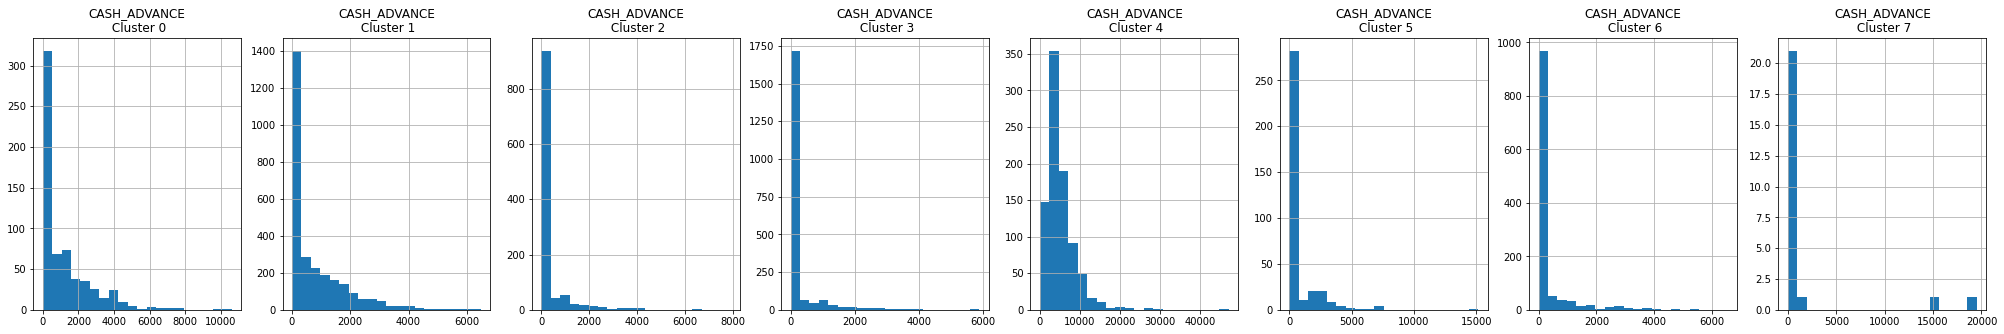

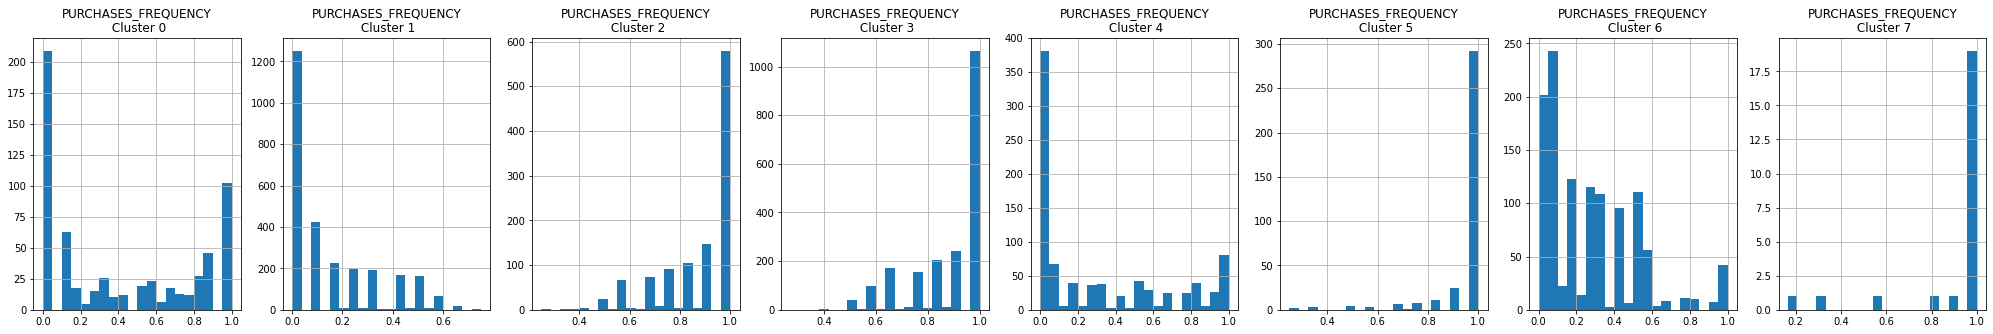

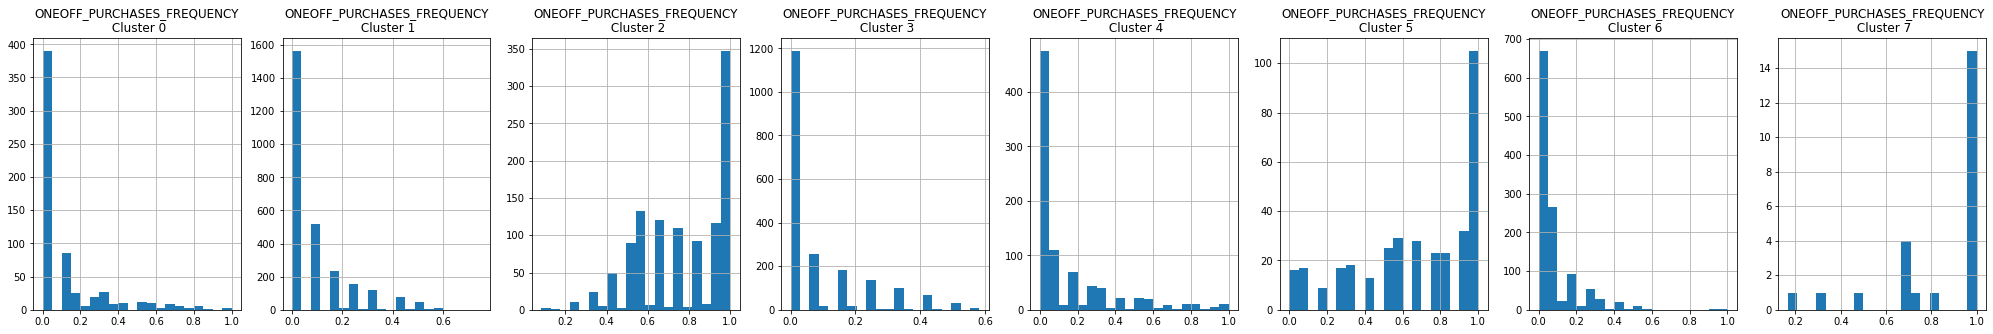

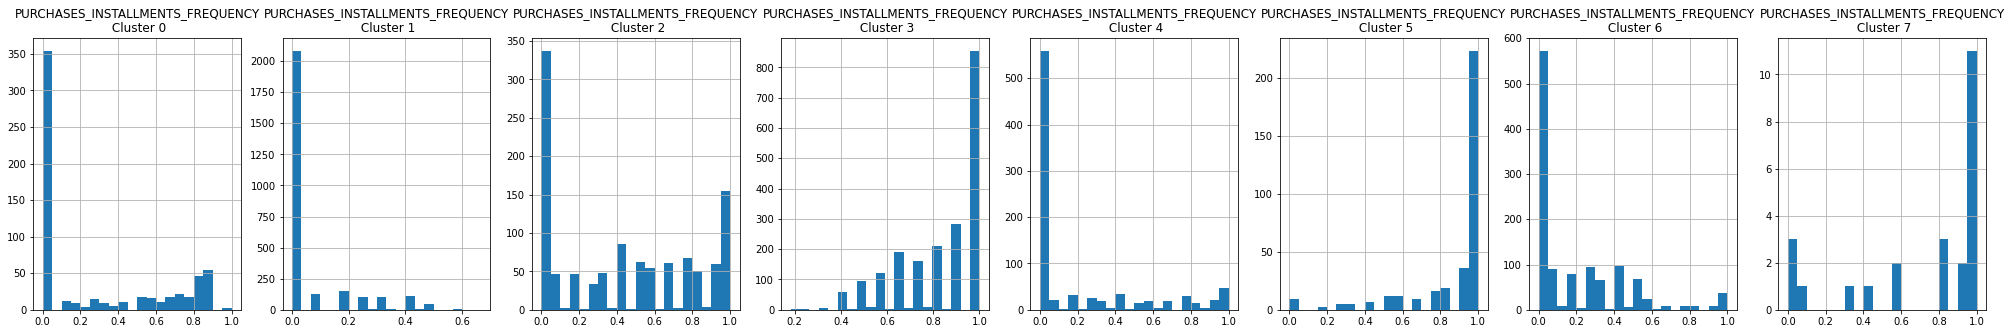

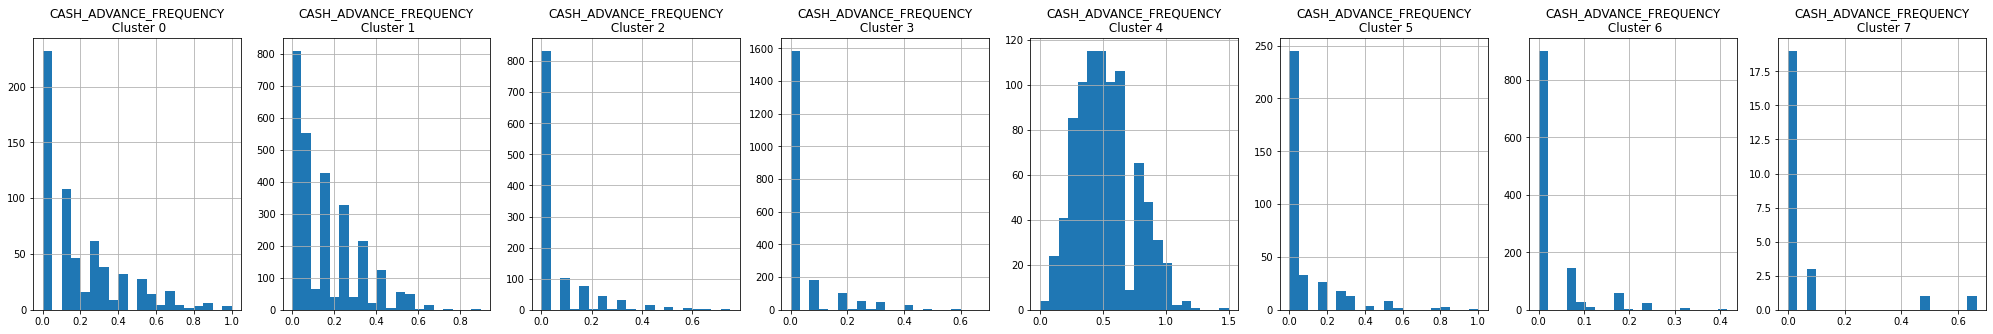

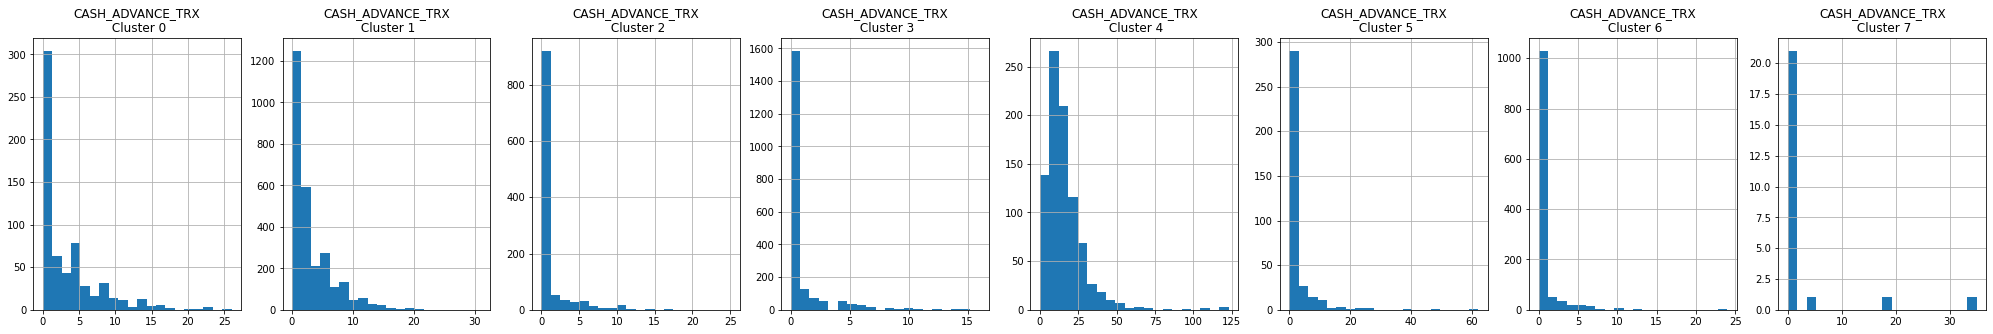

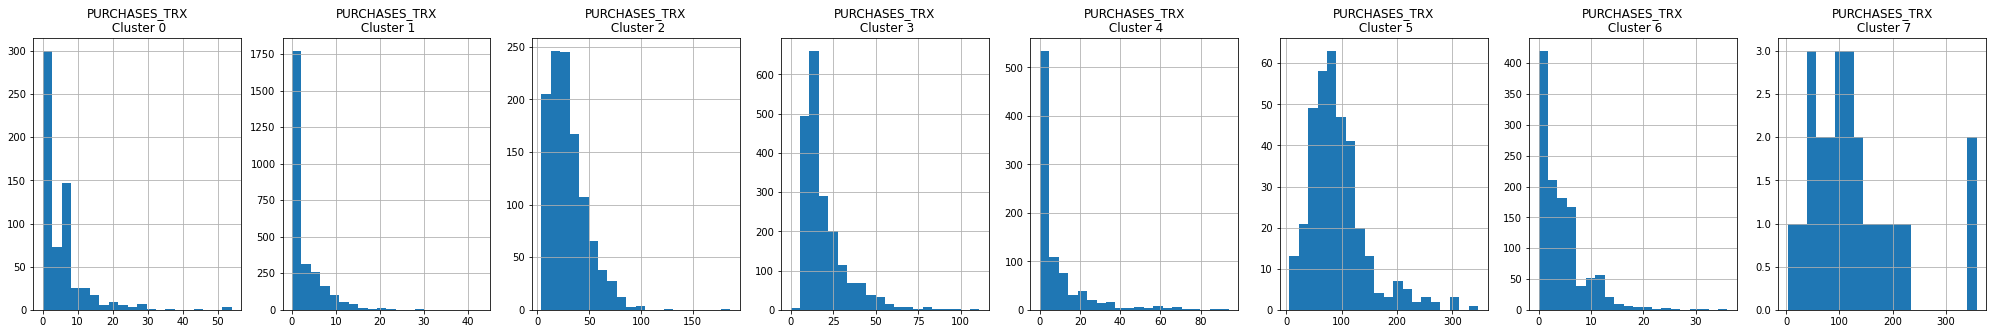

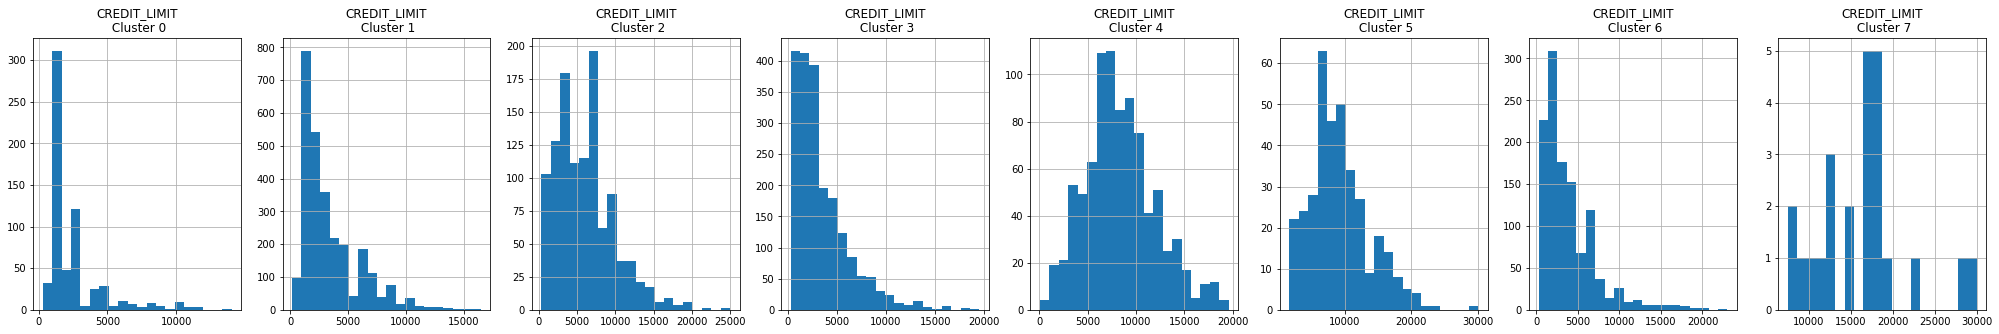

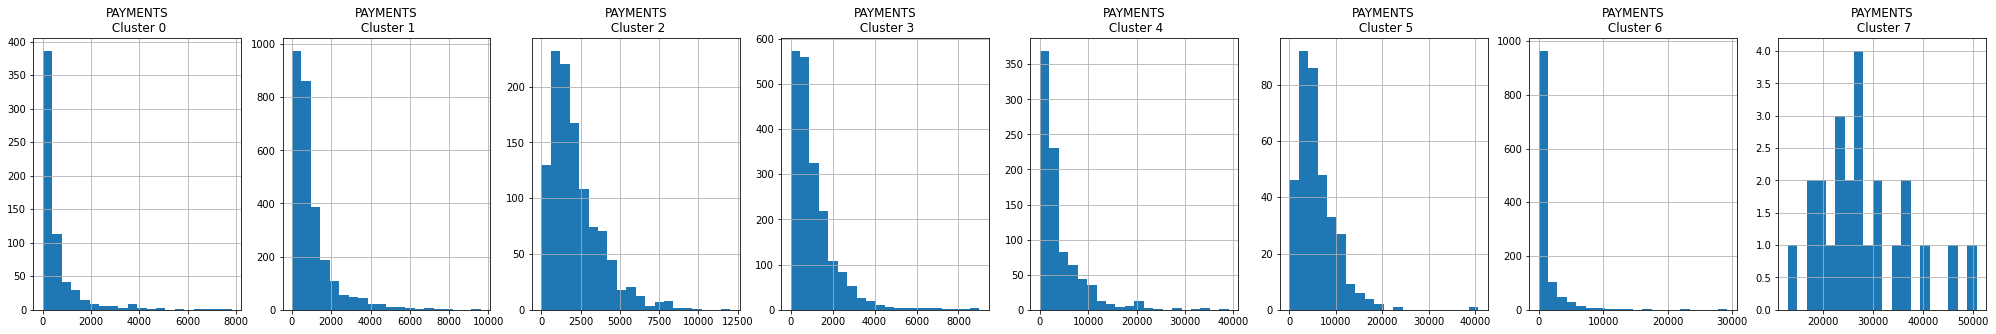

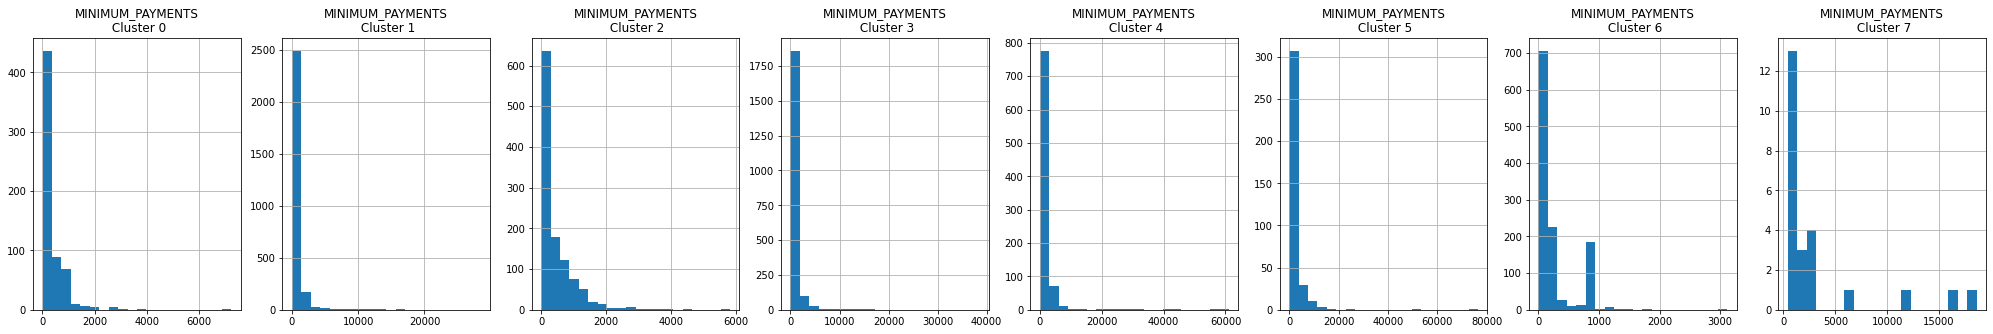

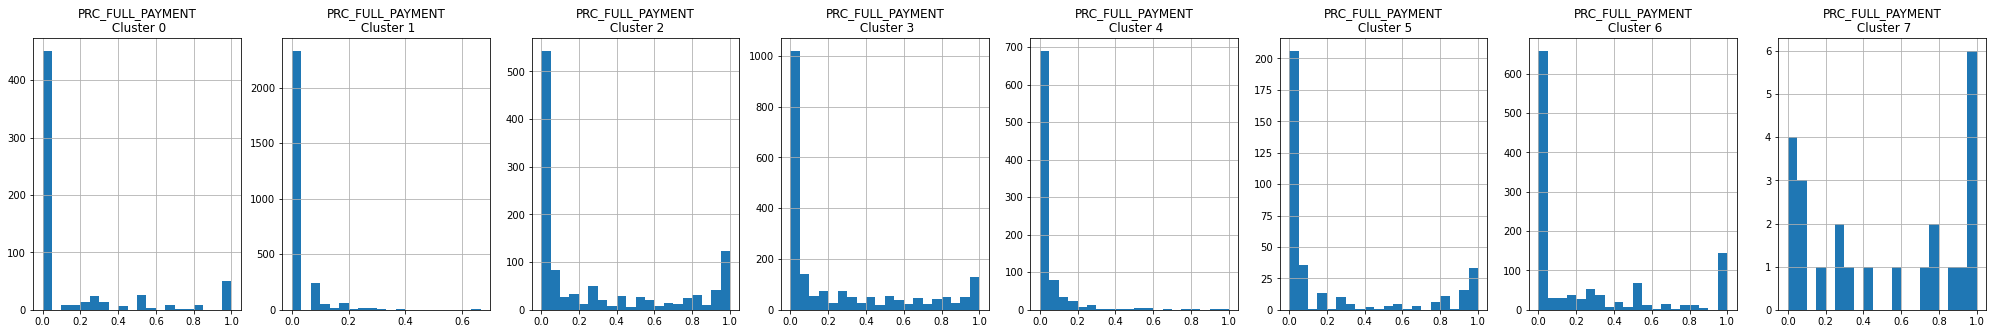

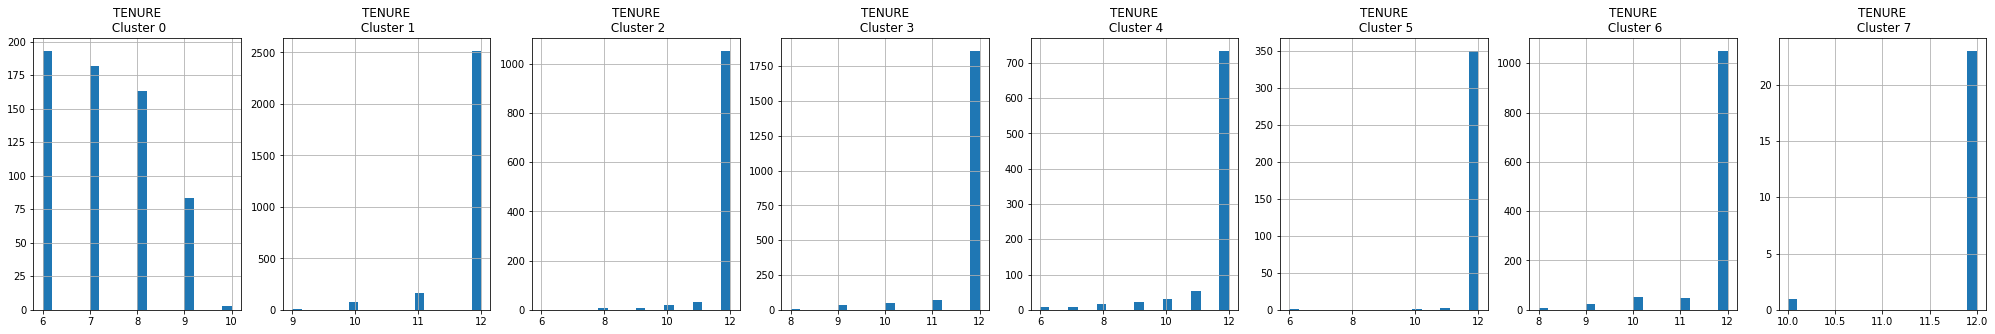

In [ ]:
# Plot the histogram of various clusters
for column in credit_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = credit_df_cluster[credit_df_cluster['cluster'] == j]
    cluster[column].hist(bins=20)
    plt.title(f'{column}\n Cluster {j}')

plt.show()

### APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(credit_df_scaled)
pca_data

array([[-1.68222178, -1.07644362],
       [-1.13830177,  2.50649466],
       [ 0.96966685, -0.38355306],
       ...,
       [-0.92620418, -1.81078439],
       [-2.3365537 , -0.657964  ],
       [-0.55642673, -0.40048922]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(pca_data, columns=['PCA1','PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.682222,-1.076444
1,-1.138302,2.506495
2,0.969667,-0.383553
3,-0.873618,0.043187
4,-1.599439,-0.688581


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df['cluster'] = credit_df_cluster['cluster']
pca_df.head()

,PCA1,PCA2,cluster
0,-1.682222,-1.076444,1
1,-1.138302,2.506495,4
2,0.969667,-0.383553,2
3,-0.873618,0.043187,1
4,-1.599439,-0.688581,1


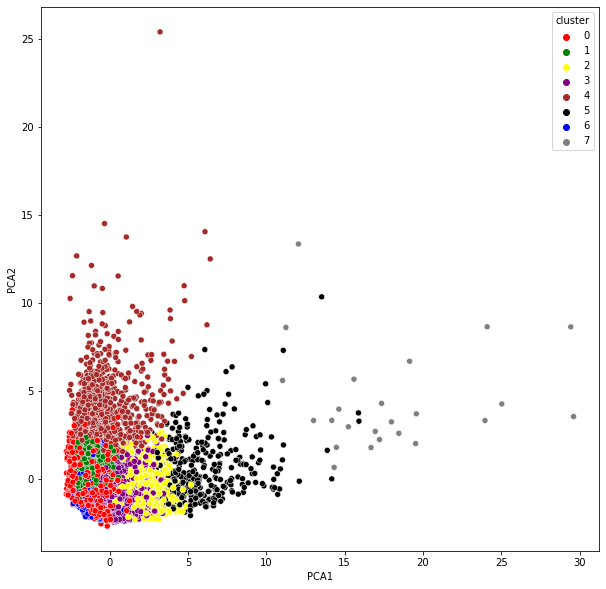

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'PCA1', y='PCA2', hue='cluster', data=pca_df, palette=['red','green','yellow','purple','brown','black','blue','gray'])

Here, we see can see some separation in the clusters, but still there are overlappings in many places and therefore it does not look good. 

# APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD


In [ ]:
input = Input(shape = (17,))

# encoder
x = Dense(7, activation='relu')(input)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform', )(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# Decoder
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)


# Autoencoder
autoencoder = Model(input, decoded)

#Encoder
encoder = Model(input, encoded)


autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(credit_df_scaled, credit_df_scaled, batch_size=128, epochs=25)

Epoch 1/25
70/70 [==============================] - 7s 78ms/step - loss: 0.6536
Epoch 2/25
70/70 [==============================] - 5s 78ms/step - loss: 0.3597
Epoch 3/25
70/70 [==============================] - 5s 75ms/step - loss: 0.2708
Epoch 4/25
70/70 [==============================] - 5s 74ms/step - loss: 0.2296
Epoch 5/25
70/70 [==============================] - 5s 74ms/step - loss: 0.2064
Epoch 6/25
70/70 [==============================] - 5s 76ms/step - loss: 0.1822
Epoch 7/25
70/70 [==============================] - 5s 67ms/step - loss: 0.1637
Epoch 8/25
70/70 [==============================] - 5s 72ms/step - loss: 0.1635
Epoch 9/25
70/70 [==============================] - 5s 66ms/step - loss: 0.1555
Epoch 10/25
70/70 [==============================] - 5s 71ms/step - loss: 0.1641
Epoch 11/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1350
Epoch 12/25
70/70 [==============================] - 3s 50ms/step - loss: 0.1374
Epoch 13/25
70/70 [==================

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [ ]:
# get the encoded results (reduced dimensonality)
pred = encoder.predict(credit_df_scaled)
pred

array([[0.6596781 , 0.        , 0.        , ..., 0.2600278 , 1.1145687 ,
        0.        ],
       [2.8227248 , 0.        , 0.        , ..., 0.72743917, 3.6346335 ,
        0.        ],
       [1.1796563 , 0.        , 0.        , ..., 2.1097813 , 0.0949681 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.2029903 , 3.3373594 ,
        0.        ],
       [0.07588048, 0.        , 0.        , ..., 0.80804044, 3.63072   ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.6828684 , 3.7107565 ,
        0.        ]], dtype=float32)

In [ ]:
pred.shape

(8950, 10)

In [ ]:
scores_2 = []
k_values = range(1,21)

for i in k_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

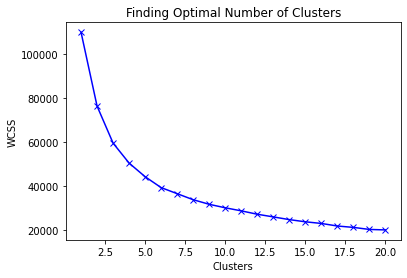

In [ ]:
plt.plot(k_values,scores_2,'bx-')
plt.title("Finding Optimal Number of Clusters")
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

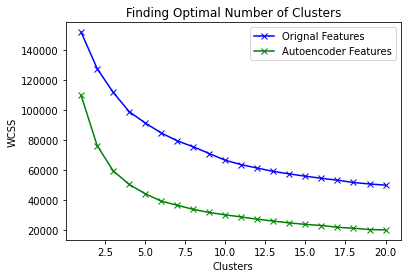

In [ ]:
plt.plot(k_values,scores_1,'bx-', label = "Orignal Features")
plt.plot(k_values,scores_2,'gx-', label = "Autoencoder Features")
plt.title("Finding Optimal Number of Clusters")
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

From the comparison of the performing search for K number of clusters, we see that we get much lower WCSS value with features from autoencoders.

In [ ]:
# using k = 4 with autoencoder features
kmeans = KMeans(n_clusters=4)
kmeans.fit(pred)
labels = kmeans.labels_

In [ ]:
df_cluster = pd.concat([credit_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
# performing PCA for visualizing the results
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(pca_comp, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.688288,0.127580
1,1.355155,1.611669
2,-1.152394,-1.279075
3,-1.546994,0.736129
4,-2.339932,-0.014675


In [ ]:
# add clusters
pca_df['cluster'] = labels
pca_df.head()

,PCA1,PCA2,cluster
0,-1.688288,0.127580,1
1,1.355155,1.611669,2
2,-1.152394,-1.279075,1
3,-1.546994,0.736129,1
4,-2.339932,-0.014675,1


In [ ]:
pca_df

,PCA1,PCA2,cluster
0,-1.688288,0.127580,1
1,1.355155,1.611669,2
2,-1.152394,-1.279075,1
3,-1.546994,0.736129,1
4,-2.339932,-0.014675,1
...,...,...,...
8945,0.729054,0.612332,2
8946,-0.056038,0.749532,2
8947,0.294168,0.965688,2
8948,-0.295608,1.843309,2


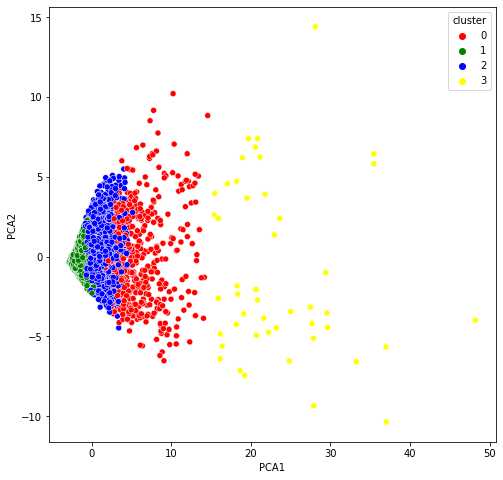

In [ ]:
# plotting the results
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue='cluster', data = pca_df, palette=['red', 'green', 'blue', 'yellow'])

Now, we can see a clear separation of the clusters.